<a href="https://colab.research.google.com/github/xxshenanigans/Project4/blob/main/AI_04_%EC%A0%95%EC%A7%80%ED%98%9C_Section4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#OpenCV+딥러닝을 적용해 연속 문자 인식#

[reference](https://github.com/parkskwan/ocr_img)

문자인식(Character Recognition)이란 시각 정보를 통하여 문자를 인식하고 의미를 이해하는 인간의 능력을 컴퓨터로 실현하려는 패턴인식(Pattern Recognition)의 한 분야로서, 광학 문자 인식(Optical Character Recognition), 우편물 자동 분류, 문서인식, 도면인식 등의 분야에서 부분적으로 실용화가 이루어지게 되었으며, 요즈음에는 인공지능(Artificial Intelligence)의 최신기법인 신경망(Neural Network)과 접목에 의해 문자인식 기술은 새로운 단계에 접어들게 되었습니다.

OpenCV와 딥러닝을 사용해 이미지에 있는 숫자를 인식해 보겠습니다.

##OpenCV를 이용하여 글자가 적힌 영역 추출하기##

여러 개의 글자가 적혀 있으므로 이미지에서 문자가 어디 적혀 있는지 인식시켜야 합니다. 

In [ ]:
import sys, cv2 
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

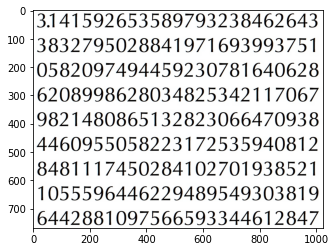

In [ ]:
# 이미지 읽어 들이기

im = cv2.imread('/content/numbers100.jpg')

plt.imshow(im)
plt.show()

In [ ]:
# 그레이스케일 변환, 블러 적용, 이진화

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

In [ ]:
# 윤곽 추출하기
# 두번째 매개변수를 cv2.RETR_LIST로 지정하면 모든 구간의 외곽을 검출합니다.
# 두번째 매개변수를 cv2.RETR_EXTERNAL로 지정하면 영역의 가장 외곽 부분만 검출합니다.
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# 추출한 윤곽을 반복 처리하기

for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  if h < 20: continue # 너무 작으면 건너뛰기
  red = (0, 0, 255) 
  cv2.rectangle(im, (x, y), (x+w, y+h), red, 2)

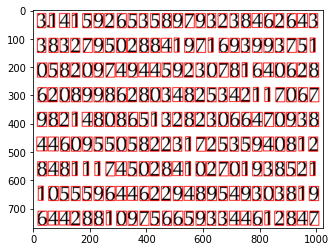

In [ ]:
cv2.imwrite('numbers100-contour.png', im) 

image = mpimg.imread("numbers100-contour.png")
plt.imshow(image); plt.show()

##딥러닝을 이용하여 문자 인식 데이터 만들기##

각 문자 영역을 추출했으므로 각 글자를 인식시켜 보겠습니다. MNIST의 손글씨 숫자 데이터를 Keras + TensorFlow를 이용하여 학습한 다음 문자를 인식시켜 보겠습니다. 

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import h5py

In [ ]:
# MNIST 데이터 읽어 들이기

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# 데이터를 float32 자료형으로 변환하고 정규화하기

X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

X_train /= 255; X_test /= 255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기

y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test , 10)

In [ ]:
# 모델 구조 정의하기

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [ ]:
# 모델 구축하기

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=600, epochs=10)

Epoch 1/10
100/100 [==============================] - 6s 52ms/step - loss: 0.4016 - accuracy: 0.8836 - val_loss: 0.1594 - val_accuracy: 0.9506
Epoch 2/10
100/100 [==============================] - 4s 45ms/step - loss: 0.1438 - accuracy: 0.9574 - val_loss: 0.0996 - val_accuracy: 0.9695
Epoch 3/10
100/100 [==============================] - 4s 45ms/step - loss: 0.0987 - accuracy: 0.9707 - val_loss: 0.0829 - val_accuracy: 0.9752
Epoch 4/10
100/100 [==============================] - 4s 45ms/step - loss: 0.0722 - accuracy: 0.9773 - val_loss: 0.0748 - val_accuracy: 0.9766
Epoch 5/10
100/100 [==============================] - 4s 45ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0659 - val_accuracy: 0.9784
Epoch 6/10
100/100 [==============================] - 5s 45ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0630 - val_accuracy: 0.9807
Epoch 7/10
100/100 [==============================] - 4s 45ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0614 - val_accuracy: 0.9816

In [ ]:
# 테스트 데이터로 평가하기

score = model.evaluate(X_test, y_test, batch_size = 200, verbose=1)

print();
print("loss =", score[0], ", accuracy =", score[1], ", baseline error = %.2f%%" % (100-score[1]*100))

50/50 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 0.9818

loss = 0.05896638706326485 , accuracy = 0.9818000197410583 , baseline error = 1.82%


In [ ]:
# 추출한 좌표 정렬하기

rects = []
im_w = im.shape[1]


for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)

    # 너무 작으면 무시
    if w < 10 or h < 10: continue
    
    # 너무 크면 무시
    if w > im_w / 5: continue  

    # Y 좌표 맞추기
    y2 = round(y/10)*10 
    index = y2 * im_w + x

    rects.append((index, x, y, w, h))

In [ ]:
# 정렬하기
rects = sorted(rects, key=lambda x:x[0]) 

X = []
for i, r in enumerate(rects):
    index, x, y, w, h = r

    num = gray[y:y+h, x:x+w] # 부분 이미지 추출하기
    num = 255 - num #반전하기

    # 정사각형 내부에 그림 옮기기
    ww = round((w if w > h else h) * 1.85)
    spc = np.zeros((ww, ww))

    wy = (ww-h)//2
    wx = (ww-w)//2

    spc[wy:wy+h, wx:wx+w] = num
    
    # MNIST 크기에 맞추기
    num = cv2.resize(spc, (28, 28))
    
    # 데이터 정규화
    num = num.reshape(28*28)
    num = num.astype("float32") / 255
    X.append(num)

In [ ]:
# 예측하기

s="314159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230" +\
"664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847"

answer = list(s)

correct = 0

nlist = model.predict(np.array(X))

for i, n in enumerate(nlist):
    ans = n.argmax()

    if ans == int(answer[i]):
        correct += 1

    else:
        print("[ng]", i, "번째", ans, " != ", answer[i])

print("정답률 : ", correct / len(nlist))

[ng] 11 번째 4  !=  8
[ng] 18 번째 4  !=  8
[ng] 26 번째 4  !=  8
[ng] 32 번째 7  !=  0
[ng] 34 번째 4  !=  8
[ng] 35 번째 4  !=  8
[ng] 50 번째 1  !=  0
[ng] 51 번째 7  !=  5
[ng] 52 번째 5  !=  8
[ng] 53 번째 4  !=  2
[ng] 54 번째 2  !=  0
[ng] 55 번째 7  !=  9
[ng] 56 번째 9  !=  7
[ng] 57 번째 7  !=  4
[ng] 58 번째 4  !=  9
[ng] 59 번째 9  !=  4
[ng] 61 번째 4  !=  5
[ng] 62 번째 5  !=  9
[ng] 63 번째 9  !=  2
[ng] 64 번째 2  !=  3
[ng] 65 번째 3  !=  0
[ng] 66 번째 0  !=  7
[ng] 67 번째 7  !=  8
[ng] 68 번째 4  !=  1
[ng] 74 번째 4  !=  8
[ng] 77 번째 7  !=  0
[ng] 78 번째 4  !=  8
[ng] 81 번째 4  !=  8
[ng] 84 번째 4  !=  8
[ng] 85 번째 7  !=  0
[ng] 88 번째 4  !=  8
[ng] 97 번째 7  !=  0
[ng] 101 번째 4  !=  8
[ng] 105 번째 4  !=  8
[ng] 107 번째 4  !=  8
[ng] 113 번째 4  !=  8
[ng] 124 번째 4  !=  8
[ng] 128 번째 7  !=  0
[ng] 134 번째 4  !=  8
[ng] 146 번째 7  !=  0
[ng] 147 번째 4  !=  8
[ng] 150 번째 4  !=  8
[ng] 152 번째 4  !=  8
[ng] 161 번째 4  !=  8
[ng] 171 번째 4  !=  8
[ng] 176 번째 7  !=  0
[ng] 180 번째 4  !=  9
[ng] 187 번째 4  !=  9
[ng] 189 번째 4  !=  8
[ng

#파이썬 OCR 라이브러리 - pytesseract로 OCR 해보기(이미지 문자 읽기)#

[reference](https://lapina.tistory.com/83)

OCR은 Optical Character Recognition의 약자로 사람이 쓰거나 기계로 인쇄한 문자의 영상을 이미지 스캐너로 획득하여 기계가 읽을 수 있는 문자로 변환하는 것을 뜻한다.

사용할 라이브러리는 pytesseract이다.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,763 kB/s)
debconf: unable to initi

In [ ]:
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow 

In [ ]:
# 이미지를 불러와 gray 스케일로 변환해 준다.

image = cv2.imread('/content/R1280x0.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

650 3428



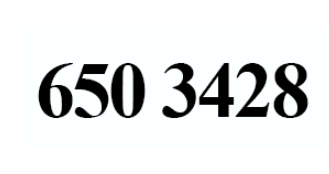

In [ ]:
# pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

# pytesseract의 image to string을 써준다. 
# 숫자니까 lang = 'None'으로
text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

# 결과를 보자.
print(text)
plt.imshow(image); plt.show()

Sees oes

‘Mr Johnny Welsh 30 October 2003
46 Baker Street

London

NW2 2LK,

GREAT BRITAIN

 



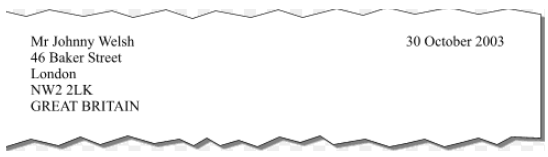

In [ ]:
image = cv2.imread('/content/R1280x2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

print(text)
cv2_imshow(image)

PREREQUISITES

In order to make the most of this, you will need to have
a little bit of programming experience. All examples in this
book are in the Python programming language. Familiarity
with Python or other scripting languages is suggested, but
not required.

You'll also need to know some basic mathematics. This
book is hands-on and example driven: lots of examples and
lots of code, so even if your math skills are not up to par,
do not worry! The examples are very detailed and heavily
documented to help you follow along.



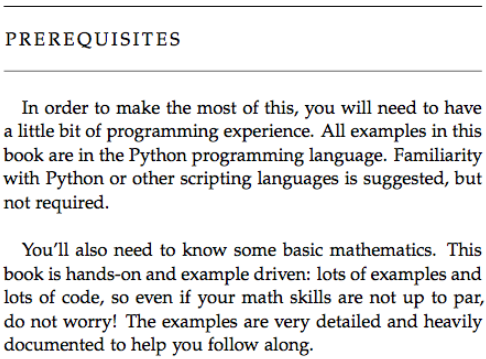

In [ ]:
image = cv2.imread('/content/R1280x1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

print(text)
cv2_imshow(image)

3.141592653589793238462643
3832795028841971693993751
0582097494459230781640628
6208998628034825342117067
9821480865 132823066470938
446095505822317253594081 2
8481117450284102701938521
1055596446229489549303819
6442881097566593344612847



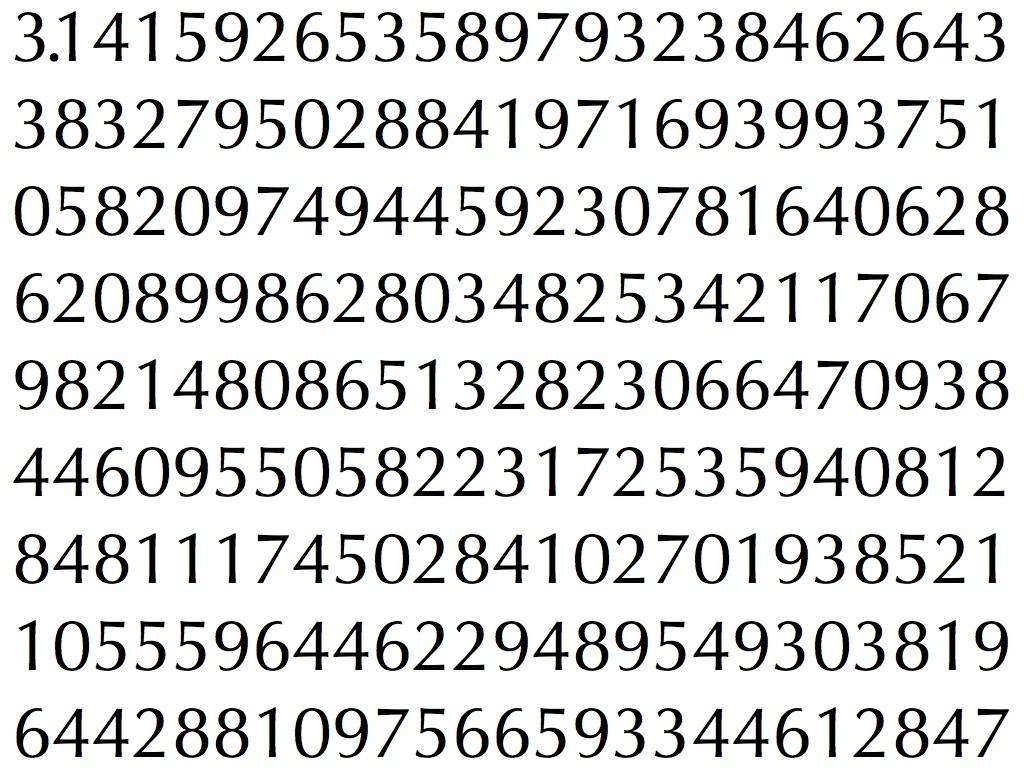

In [ ]:
image = cv2.imread('/content/numbers100.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

print(text)
plt.imshow(image); plt.show()

'CHEBP! N\n\x0c'


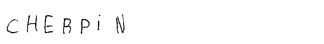

In [ ]:
image = cv2.imread('/content/drive/MyDrive/input/test/TEST_0005.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

print(text)
cv2_imshow(image)

#Handwriting Recognition using CRNN in Keras#

[reference](https://www.kaggle.com/samfc10/handwriting-recognition-using-crnn-in-keras)

In this notebook, we'll go through the steps to train a CRNN (CNN+RNN) model for handwriting recognition. The model will be trained using the CTC(Connectionist Temporal Classification) loss. I'll be using Keras for building our CRNN model.

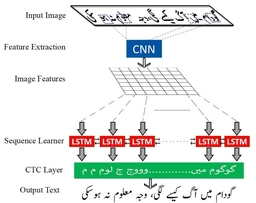

In [ ]:
import random
import pandas as pd

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, Reshape, Bidirectional, LSTM, Dense, Lambda, BatchNormalization

##Load and view data##

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/input/written_name_train_v2.csv')
valid = pd.read_csv('/content/drive/MyDrive/input/written_name_validation_v2.csv')

In [ ]:
train = train.head(33001)
train

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE
...,...,...
32996,TRAIN_32997.jpg,LEANE
32997,TRAIN_32998.jpg,DEBONNE
32998,TRAIN_32999.jpg,PAUL
32999,TRAIN_33000.jpg,LOPA


In [ ]:
# valid = valid.drop(valid.index[4201:])
valid = valid.head(4201)
valid

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP
...,...,...
4196,VALIDATION_4197.jpg,JULIEN
4197,VALIDATION_4198.jpg,LE PENNEL
4198,VALIDATION_4199.jpg,THIBAULT
4199,VALIDATION_4200.jpg,MOREAU


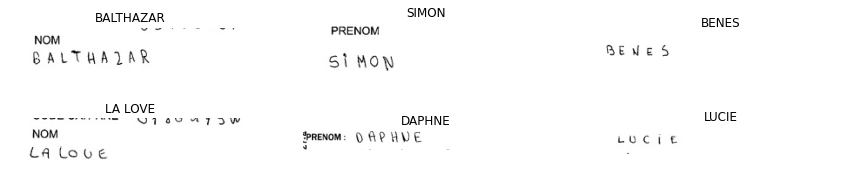

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = '/content/drive/MyDrive/input/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

##Cleaning Data##

Let's check for NaNs in our label.

In [ ]:
train['IDENTITY'].isnull().sum()

56

In [ ]:
valid['IDENTITY'].isnull().sum()

10

In [ ]:
train.dropna(axis=0, inplace=True)
valid.dropna(axis=0, inplace=True)

Also, there are some images in our data with the label 'UNREADABLE'. Lets check those images and remove them.

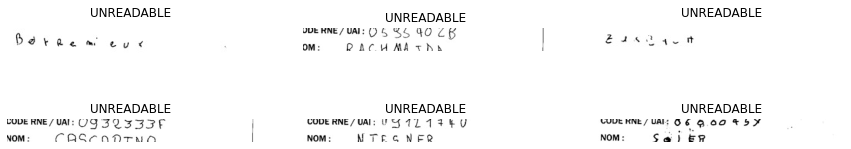

In [ ]:
unreadable = train[train['IDENTITY'] == 'UNREADABLE']
unreadable.reset_index(inplace = True, drop=True)

plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = '/content/drive/MyDrive/input/train/'+unreadable.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
train = train[train['IDENTITY'] != 'UNREADABLE']
valid = valid[valid['IDENTITY'] != 'UNREADABLE']

There are some labels which are in lowercase. To maintain uniformity in the labels, I convert all the labels to uppercase.

In [ ]:
train['IDENTITY'] = train['IDENTITY'].str.upper()
valid['IDENTITY'] = valid['IDENTITY'].str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Reset the index and we are done with cleaning.

In [ ]:
train.reset_index(inplace = True, drop=True) 
valid.reset_index(inplace = True, drop=True)

In [ ]:
print(train.shape)
train.head()

(32934, 2)


,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [ ]:
print(valid.shape)
valid.head()

(4189, 2)


,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


##Preprocessing and preparing the images for training##

- The images are loaded as grayscale and reshaped to width 256 and height 64.
- The width and height are cropped if they are greater than 256 and 64 respectively. If they are smaller, then the image is padded with white pixels. Finally the image is rotated clockwise to bring the image shape to (x, y).
- The image is then normalized to range [0, 1]

In [ ]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # blank white image
    
    # crop
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

The model will be trained on 8000 images and validate on 1000 images

In [ ]:
train_size = 8000
valid_size= 1000 

In [ ]:
train_size, valid_size

(8000, 1000)

In [ ]:
train_x = []

for i in range(train_size):
    img_dir = '/content/drive/MyDrive/input/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    train_x.append(image)

In [ ]:
valid_x = []

for i in range(valid_size):
    img_dir = '/content/drive/MyDrive/input/validation/'+valid.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    valid_x.append(image)

In [ ]:
train_x = np.array(train_x).reshape(-1, 256, 64, 1)
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)

##Preparing the labels for CTC Loss##

The labels have to be converted to numbers which represent each character in the training set. The 'alphabets' consist of A-Z and three special characters (- ' and space).

In [ ]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24   # max length of input labels
num_of_characters = len(alphabets) + 1   # +1 for ctc pseudo blank
num_of_timestamps = 64   # max length of predicted labels


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:   # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [ ]:
name = 'JIHYE'
print(name, '\n',label_to_num(name))

JIHYE 
 [ 9  8  7 24  4]


- **train_y** contains the true labels converted to numbers and padded with -1. The length of each label is equal to max_str_len.
- **train_label_len** contains the length of each true label (without padding)
- **train_input_len** contains the length of each predicted label. The length of all the predicted labels is constant i.e number of timestamps - 2.
- **train_output** is a dummy output for ctc loss.

In [ ]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])]= label_to_num(train.loc[i, 'IDENTITY'])    

In [ ]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(valid.loc[i, 'IDENTITY'])]= label_to_num(valid.loc[i, 'IDENTITY'])    

In [ ]:
print('True label : ', train.loc[100, 'IDENTITY'] , '\n train_y : ', train_y[100], '\n train_label_len : ', train_label_len[100], 
      '\n train_input_len : ', train_input_len[100])

True label :  NOUR 
 train_y :  [13. 14. 20. 17. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.] 
 train_label_len :  [4.] 
 train_input_len :  [62.]


##Building our model##

In [ ]:
input_data = Input(shape=(256, 64, 1), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

# RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

# OUTPUT
inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 256, 64, 1)]      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 64, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 64, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 256, 64, 32)       0         
_________________________________________________________________
max1 (MaxPooling2D)          (None, 128, 32, 32)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 128, 32, 64)       18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 32, 64)       256   

The output shape of the predictions is (64, 30). The model predicts words of 64 characters and each character contains the probability of the 30 alphabets which we defined earlier.

In [ ]:
# the ctc loss function
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

##Train our model##

In [ ]:
# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0001))

model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=60, batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/60
63/63 [==============================] - 66s 458ms/step - loss: 36.4476 - val_loss: 22.4175
Epoch 2/60
63/63 [==============================] - 25s 398ms/step - loss: 20.8487 - val_loss: 22.5473
Epoch 3/60
63/63 [==============================] - 25s 399ms/step - loss: 20.4413 - val_loss: 21.2750
Epoch 4/60
63/63 [==============================] - 27s 422ms/step - loss: 20.2644 - val_loss: 20.7931
Epoch 5/60
63/63 [==============================] - 26s 409ms/step - loss: 20.1653 - val_loss: 20.6325
Epoch 6/60
63/63 [==============================] - 25s 399ms/step - loss: 20.0804 - val_loss: 20.4527
Epoch 7/60
63/63 [==============================] - 25s 396ms/step - loss: 20.0028 - val_loss: 20.3530
Epoch 8/60
63/63 [==============================] - 25s 394ms/step - loss: 19.9109 - val_loss: 20.2881
Epoch 9/60
63/63 [==============================] - 25s 394ms/step - loss: 19.8155 - val_loss: 20.1393
Epoch 10/60
63/63 [==============================] - 25s 396ms/step - los

##Check model performance on validation set##

In [ ]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
y_true = valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 64.02%
Correct words predicted      : 38.10%


##Some predictions on test set##

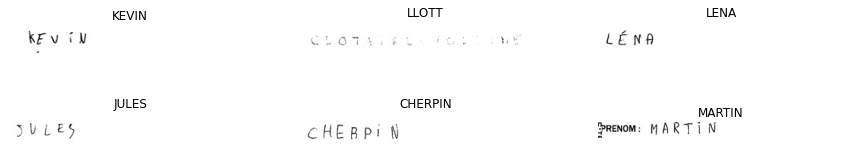

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/input/written_name_test_v2.csv')

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = '/content/drive/MyDrive/input/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = preprocess(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

##유사한 문자 이미지 출력##

GORTCHAKOFF
GORTCHAROT


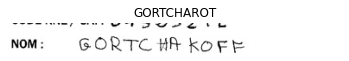

In [ ]:
# 이미지를 입력하여 문자 인식

idx = 10
img_dir = '/content/drive/MyDrive/input/test/'+test.loc[idx, 'FILENAME']
image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

image = preprocess(image)
image = image/255.
pred = model.predict(image.reshape(1, 256, 64, 1))
decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
plt.title(num_to_label(decoded[0]), fontsize=12)
plt.axis('off')

print(test.loc[idx, 'IDENTITY'])   
print(num_to_label(decoded[0])) 
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
# text에 인식한 문자 저장 

text = num_to_label(decoded[0])

In [ ]:
train_copy = train.copy()

In [ ]:
# 문자 벡터화

def bin(name):

    chars = []

    for i in alphabets:
        count = 0
        for j in name:
            if i == j:
                count +=1
        chars.append(count)

    return chars

train_copy['bin'] = train_copy['IDENTITY'].apply(lambda x: bin(x)) 

In [ ]:
train_copy

,FILENAME,IDENTITY,bin
0,TRAIN_00001.jpg,BALTHAZAR,"[3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
1,TRAIN_00002.jpg,SIMON,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
2,TRAIN_00003.jpg,BENES,"[0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,TRAIN_00004.jpg,LA LOVE,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, ..."
4,TRAIN_00005.jpg,DAPHNE,"[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...
32929,TRAIN_32997.jpg,LEANE,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
32930,TRAIN_32998.jpg,DEBONNE,"[0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, ..."
32931,TRAIN_32999.jpg,PAUL,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
32932,TRAIN_33000.jpg,LOPA,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."


In [ ]:
text = bin(text)

In [ ]:
from numpy import dot 
from numpy.linalg import norm

In [ ]:
# 유사도 측정

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

cosine_sim = []
for i in range(len(train_copy)):
    cosine_sim.append(cos_sim(text, train_copy['bin'][i]))

In [ ]:
scores = list(enumerate(cosine_sim))

In [ ]:
scores = sorted(scores, key=lambda x: x[1], reverse=True)
scores[:10]

[(14301, 0.9185586535436918),
 (26105, 0.9185586535436918),
 (29481, 0.9185586535436918),
 (29713, 0.9013878188659974),
 (99, 0.8944271909999159),
 (28615, 0.8944271909999159),
 (10125, 0.8838834764831843),
 (19314, 0.8838834764831843),
 (7206, 0.875),
 (7271, 0.875)]

In [ ]:
indices = [j[0] for j in scores[:6]]
indices

[14301, 26105, 29481, 29713, 99, 28615]

In [ ]:
train_copy['IDENTITY'].iloc[indices]

14301     HARGOT
26105     ROCHAT
29481     CHAROT
29713    TORTORA
99         GAROT
28615      RAGOT
Name: IDENTITY, dtype: object

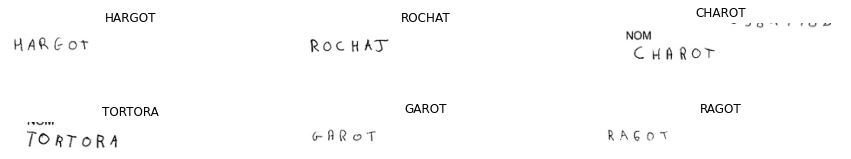

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = '/content/drive/MyDrive/input/train/'+train.loc[indices[i], 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(train.loc[indices[i], 'IDENTITY'], fontsize=12)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=-0.8)